In this example, we illustrate the convergence of ACF and FT w.r.t. the number of data points

In [1]:
import os
import sys
import math
import copy

if sys.platform=="cygwin":
    from cyglibra_core import *
elif sys.platform=="linux" or sys.platform=="linux2":
    from liblibra_core import *

from libra_py import units
from libra_py import influence_spectrum


import matplotlib.pyplot as plt   # plots
%matplotlib inline 

plt.rc('axes', titlesize=24)      # fontsize of the axes title
plt.rc('axes', labelsize=20)      # fontsize of the x and y labels
plt.rc('legend', fontsize=20)     # legend fontsize
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels

plt.rc('figure.subplot', left=0.2)
plt.rc('figure.subplot', right=0.95)
plt.rc('figure.subplot', bottom=0.13)
plt.rc('figure.subplot', top=0.88)

colors = {}

colors.update({"11": "#8b1a0e"})  # red       
colors.update({"12": "#FF4500"})  # orangered 
colors.update({"13": "#B22222"})  # firebrick 
colors.update({"14": "#DC143C"})  # crimson   

colors.update({"21": "#5e9c36"})  # green
colors.update({"22": "#006400"})  # darkgreen  
colors.update({"23": "#228B22"})  # forestgreen
colors.update({"24": "#808000"})  # olive      

colors.update({"31": "#8A2BE2"})  # blueviolet
colors.update({"32": "#00008B"})  # darkblue  

colors.update({"41": "#2F4F4F"})  # darkslategray

/home/alexey/miniconda2/envs/libra/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: to-Python converter for std::vector<std::complex<double>, std::allocator<std::complex<double> > > already registered; second conversion method ignored.
  if __name__ == '__main__':
/home/alexey/miniconda2/envs/libra/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: to-Python converter for std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > > already registered; second conversion method ignored.
  if __name__ == '__main__':
/home/alexey/miniconda2/envs/libra/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: to-Python converter for boost::python::detail::container_element<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, unsigned long, boost::python::detail::final_vector_derived_policies<std::vector<std::vector<int, std::allocator<in

Define an auxiliary function that will generate data of a given length. The data is well characterized: we know all the frequencies. The function will take an agrument that determines how many data points to generate - this is the key parameter that will be explored next, when studying the convergence.

In [2]:
def gen_data(nsteps):
    
    # Test case: 3 frequences
    data = []
    dt = 1.0 * units.fs2au
    dw = 1.0 * units.inv_cm2Ha
    w1 = 500.0 * units.inv_cm2Ha
    w2 = 1400.0 * units.inv_cm2Ha
    w3 = 850.0 * units.inv_cm2Ha
    w4 = 2050.0 * units.inv_cm2Ha
    w5 = 2500.0 * units.inv_cm2Ha
    wspan = 3000.0 * units.inv_cm2Ha

    for it in xrange(nsteps):
        t = it * dt
        d = MATRIX(5,1)
        d.set(0, 0, math.sin(w1*t) )
        d.set(1, 0, math.cos(w2*t) )
        d.set(2, 0, math.sin(w3*t) )
        d.set(3, 0, math.sin(w4*t) )
        d.set(4, 0, math.cos(w5*t) )
        data.append( d )
        
    return data

Now, lets generate several data sets of different length and analyze them

In [3]:
T, ACF, uACF, W, J, J2 = [],[],[],[],[],[] 

for nsteps in [10, 50, 100, 250, 500, 1000]:
    data = gen_data(nsteps)
    t, acf, uacf, w, j, j2 = influence_spectrum.recipe1(data, {})
    
    T.append(t)
    ACF.append(acf)
    uACF.append(uacf)
    W.append(w)
    J.append(j)
    J2.append(j2)

Use the default value =  True
Use the default value =  0
Use the default value =  spectrum.txt
Use the default value =  False
Use the default value =  1.0
Use the default value =  1.0
Use the default value =  acf.txt
Use the default value =  3000.0
Use the default value =  0
Use the default value =  True
Use the default value =  0
Use the default value =  spectrum.txt
Use the default value =  False
Use the default value =  1.0
Use the default value =  1.0
Use the default value =  acf.txt
Use the default value =  3000.0
Use the default value =  0
Use the default value =  True
Use the default value =  0
Use the default value =  spectrum.txt
Use the default value =  False
Use the default value =  1.0
Use the default value =  1.0
Use the default value =  acf.txt
Use the default value =  3000.0
Use the default value =  0
Use the default value =  True
Use the default value =  0
Use the default value =  spectrum.txt
Use the default value =  False
Use the default value =  1.0
Use the default v

In [4]:
def plot(i):
    plt.subplot(6, 2, 2*i+1)
    plt.title('ACF')
    plt.xlabel('Time, fs')
    plt.ylabel('ACF')
    plt.plot(T[i], ACF[i], label='ACF', linewidth=2, color = colors["11"]) 
    plt.plot(T[i], uACF[i], label='uACF', linewidth=2, color = colors["21"]) 
    plt.legend()

    plt.subplot(6, 2, 2*i+2)
    plt.title('Spectral Density')
    plt.xlabel('Frequency, $cm^{-1}$')
    plt.ylabel('Amplitude')
    plt.plot(W[i], J2[i], label='', linewidth=2, color = colors["11"]) 
    plt.legend()

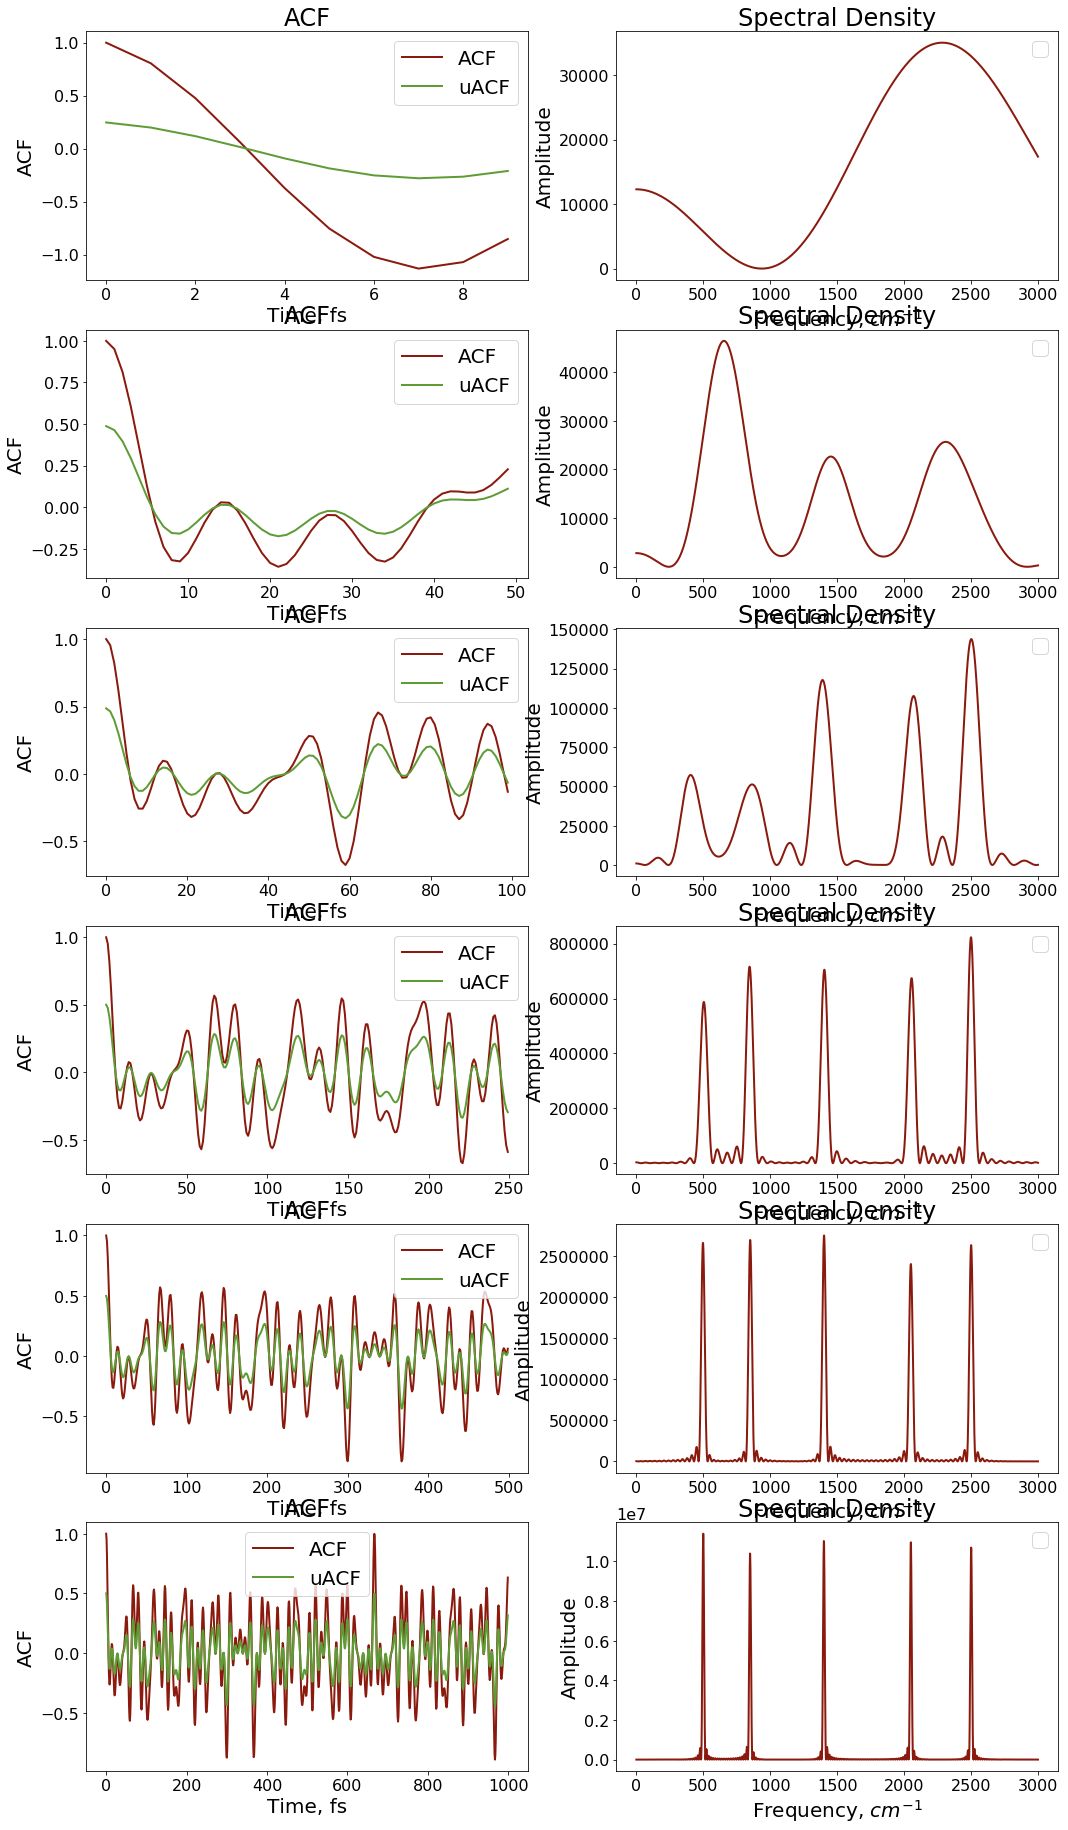

In [5]:
plt.figure(1, figsize=(18, 32)) # dpi=300, frameon=False)

for i in [0, 1, 2, 3, 4, 5]:
    plot(i)    
plt.show()
plt.close()